### Sprint 11 - Aprenentatge no supervisat - 2a part

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# this is the file that I prepared in the first part of this exercice 
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.shape

(1929004, 12)

In [4]:
data.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,CancellationCode,DelayReason,UniqueCarrier
0,-14.0,8.0,-22.0,116.0,810,20,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
1,2.0,19.0,-17.0,113.0,810,7,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
2,14.0,8.0,6.0,76.0,515,6,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN
3,34.0,34.0,0.0,77.0,515,18,1,3,4,Not Cancelled,LateAircraftDelay,WN
4,11.0,25.0,-14.0,87.0,688,19,1,3,4,Not Cancelled,Delay below 15 (unknown reason),WN


### - Exercici 2

Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [4]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

I am having trouble performing the Hierarchical model because of the big number of observations (although we are only using 3 PCA components!!) So I will use a sample of the dataset and I will calculate again PCA components from the sampled dataset. I will sample 1% of the observations.

Summary statistiscs for the whole dataset: 

In [6]:
data.describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek
count,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00,1929004.00
mean,42.19,43.08,-0.89,108.24,764.70,14.89,6.11,15.75,3.98
std,56.78,53.26,17.24,68.66,573.96,4.51,3.48,8.78,2.00
min,-109.00,0.00,-181.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,9.00,12.00,-10.00,58.00,338.00,12.00,3.00,8.00,2.00
50%,24.00,24.00,-3.00,90.00,606.00,15.00,6.00,16.00,4.00
75%,56.00,53.00,5.00,137.00,997.00,19.00,9.00,23.00,6.00
max,2461.00,2467.00,759.00,1091.00,4962.00,24.00,12.00,31.00,7.00


In [5]:
# generate a sample with 10% of the observations 
# stratify by Unique Carrier because I want to keep the proportions of each Carrier since theay are very different in size 
data_sample = data.groupby('UniqueCarrier', group_keys= False).apply(lambda x : x.sample(frac=0.01, random_state = 7))

Summary statistics for 1% of the observations: 

In [8]:
data_sample.describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek
count,19290.00,19290.00,19290.00,19290.00,19290.00,19290.00,19290.00,19290.00,19290.00
mean,42.03,42.96,-0.93,107.93,761.67,14.87,6.08,15.82,4.00
std,58.11,54.81,17.07,67.91,567.01,4.54,3.48,8.74,1.99
min,-55.00,0.00,-66.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,9.00,12.00,-10.00,58.00,341.00,11.00,3.00,8.00,2.00
50%,24.00,24.00,-3.00,91.00,610.00,15.00,6.00,16.00,4.00
75%,55.00,53.00,5.00,136.00,992.00,19.00,9.00,23.00,6.00
max,1395.00,1403.00,277.00,605.00,4962.00,24.00,12.00,31.00,7.00


The summary statistics show very similar results in the sample and in the original dataset, although we can see that some maximum and minimum values may vary, this is normal since we are taking only 1% of the observations. 

#### Scaling and PCA 

In [6]:
# use the firts 5 columns 
X = data_sample.iloc[: , : 5]

In [7]:
X.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
840447,89.0,87.0,2.0,44.0,247
1379581,12.0,9.0,3.0,30.0,120
1596541,9.0,11.0,-2.0,104.0,668
1881951,30.0,20.0,10.0,42.0,163
331864,16.0,14.0,2.0,79.0,469


In [8]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
X = trans.fit_transform(X)

In [9]:
# use the original column names 
dataset = pd.DataFrame(X, columns = data_sample.iloc[: , : 5].columns)

In [10]:
dataset.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
0,0.808195,0.803524,0.171495,-0.941401,-0.907709
1,-0.516826,-0.619651,0.230081,-1.147574,-1.131697
2,-0.568451,-0.583159,-0.062846,-0.057803,-0.165200
3,-0.207081,-0.418947,0.640178,-0.970855,-1.055859
4,-0.447994,-0.528422,0.171495,-0.425969,-0.516172


In [14]:
dataset.describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance
count,19290.00,19290.00,19290.00,19290.00,19290.00
mean,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.67,-0.78,-3.81,-1.59,-1.34
25%,-0.57,-0.56,-0.53,-0.74,-0.74
50%,-0.31,-0.35,-0.12,-0.25,-0.27
75%,0.22,0.18,0.35,0.41,0.41
max,23.28,24.82,16.28,7.32,7.41


In [11]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

PCA()

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40555932, 0.80195715, 0.9967015 , 1.        , 1.        ])

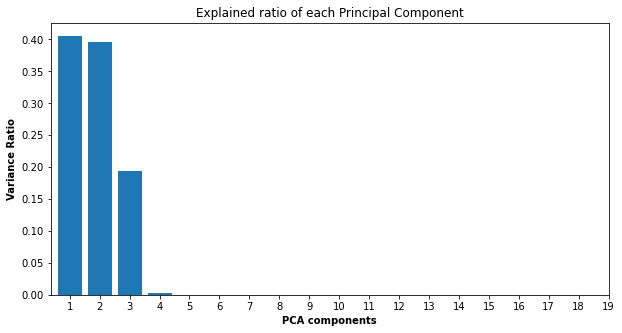

In [17]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))

ax = plt.bar(range(1, len(pca.explained_variance_ratio_) +1 ), pca.explained_variance_ratio_)
plt.xlabel('PCA components', fontweight = 'bold')
plt.ylabel('Variance Ratio', fontweight = 'bold')
plt.xticks(np.arange(1,20))
plt.title('Explained ratio of each Principal Component')
plt.show()

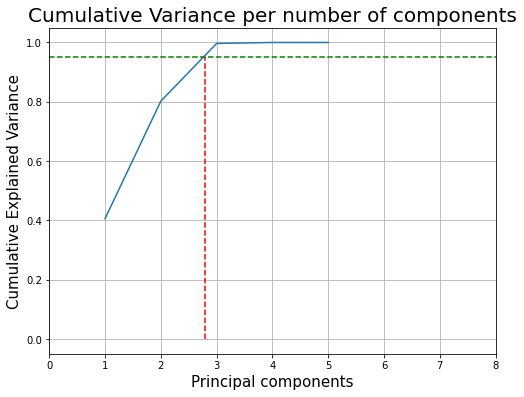

In [18]:
fig = plt.figure(figsize = (8,6)) 
pca_values = np.arange(pca.n_components_) + 1
plt.plot(pca_values, np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=2.80, ymax=0.95, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0 , colors="g", linestyles="--")
plt.ylabel('Cumulative Explained Variance', fontsize = 15)
plt.xlabel("Principal components",fontsize=15)
plt.xlim([0,8])
plt.xticks(np.arange(0,9))
plt.grid(True)
plt.title('Cumulative Variance per number of components', fontsize = 20)
plt.show()

As before, we see that with 3 PCA components we already have 95% of the variance explained, we will choose 3 components for the PCA. 

In [19]:
# as before, we will choose 3 components for our PCA
# with 3 components we can achieve 0.957 of variability
pca95 = PCA(0.95)
pca95.fit(X).n_components_

3

In [20]:
# we choose 3 components 
org_col = list(data.iloc[: , : 5].columns)
attributes_pca = pd.DataFrame({'Attribute' : org_col, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1], 
                              'PC_3':pca.components_[2]})
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,ArrDelay,0.701766,-0.009464,-0.034841
1,DepDelay,0.663960,0.003137,-0.330002
2,ElapsedDelay,0.257278,-0.042293,0.940984
3,AirTime,0.022131,0.705522,0.066029
4,Distance,-0.000246,0.707354,-0.008599


+ PC1 explains very well ArrDelay and DepDelay. 
+ AirTime and Distance are very well explained by PCA2. 
+ ElapsedDelay is very well explained by PCA3. 

This is very similar as it was before, when we did the analysis with the whole dataset

In [12]:
# set pca features to 3

pca3 = PCA(n_components= 3)
pca3.fit(X)

pca_df = pd.DataFrame(pca3.transform(X), columns = [['PCA1', 'PCA2', 'PCA3']])

pca_df.head()

,PCA1,PCA2,PCA3
0,1.124183,-1.318633,-0.186302
1,-0.740038,-1.616933,0.372953
2,-0.803521,-0.151427,0.150715
3,-0.280008,-1.458255,0.692841
4,-0.630416,-0.670318,0.327675


We can plot the data with the reduced dimensionality to see how it looks like: 

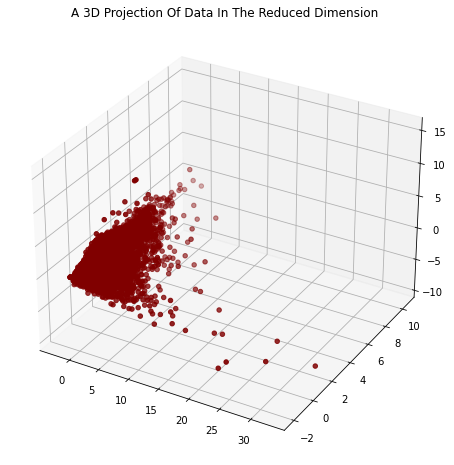

In [24]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_df["PCA1"]
y =pca_df["PCA2"]
z =pca_df["PCA3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#### Hierarchical Clustering

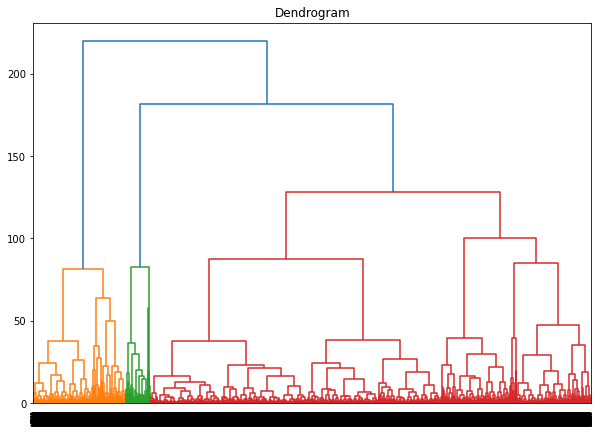

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

According to this plot, optimal number of clusters can be 3 or maybe 4, let´s chech which value looks better on our PCA features: 

In [13]:
# 3 clusters 
from sklearn.cluster import AgglomerativeClustering
# choose 3 cliusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pca_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# concat result to our pca_df 
pca_results = pca_df.copy()
pca_results['clusters_3'] = cluster.labels_

In [15]:
pca_results.head()

,PCA1,PCA2,PCA3,clusters_3
0,1.124183,-1.318633,-0.186302,0
1,-0.740038,-1.616933,0.372953,0
2,-0.803521,-0.151427,0.150715,0
3,-0.280008,-1.458255,0.692841,0
4,-0.630416,-0.670318,0.327675,0


In [16]:
pca_results.clusters_3.value_counts()

(clusters_3,)
0                15248
1                 3202
2                  840
dtype: int64

We will first make the graph in two dimensions to see what it looks like: 

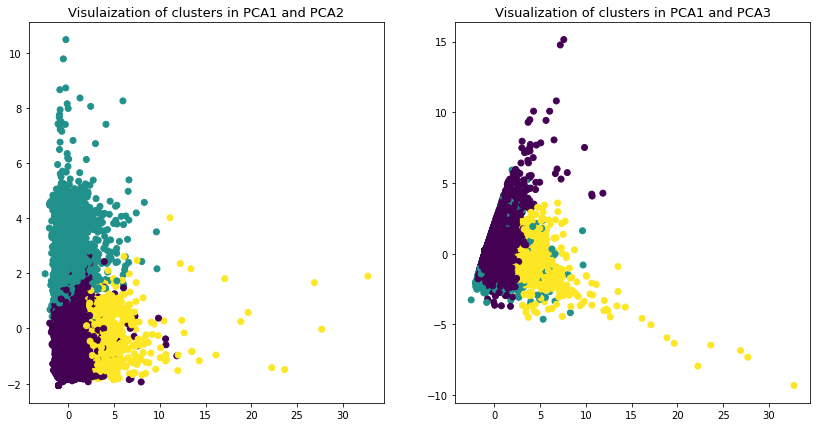

In [30]:
# Scatter plot on Principal components to visualize the spread of the data
fig = plt.figure(figsize=(14,7))

plt.subplot(121)
plt.scatter(x = pca_results['PCA1'], y = pca_results['PCA2'], c= pca_results['clusters_3']  )
plt.title('Visulaization of clusters in PCA1 and PCA2', fontsize = 13)

plt.subplot(122)
plt.scatter(x = pca_results['PCA1'], y = pca_results['PCA3'], c= pca_results['clusters_3']  )
plt.title('Visualization of clusters in PCA1 and PCA3', fontsize = 13)

plt.show()

+ PCA1 vs PCA2 : the clusters seems well defined 
+ PCA1 vs PCA3 : Here the clusters appear somewhat more mixed than in the PCA1 vs PCA2 graph. 

Let's see what it looks like in 3D: 

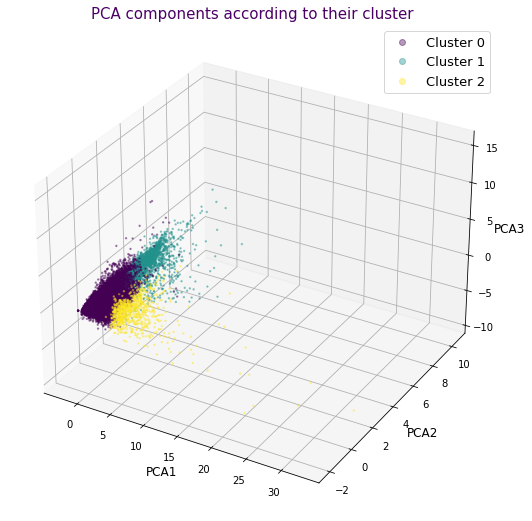

In [31]:
# seeing it in the 3 dimensions 

fig = plt.figure(figsize= (9,9))

ax = fig.add_subplot(projection = '3d')
plot = ax.scatter(pca_results['PCA1'], pca_results['PCA2'], pca_results['PCA3'], c = pca_results['clusters_3'], alpha = 0.4, s=2)
plt.legend(handles = plot.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.xlabel("PCA1", fontsize = 12)
plt.ylabel("PCA2", fontsize = 12)
ax.set_zlabel("PCA3", fontsize = 12)
plt.title('PCA components according to their cluster', fontsize= 15, color= '#4d0066')
plt.show()

In 3D the different clusters seems well defined. Let´s check now if we do 4 clusters: 

In [32]:
# 4 clusters 
from sklearn.cluster import AgglomerativeClustering

cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster4.fit_predict(pca_df)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [33]:
# concat result to our pca_results 

pca_results['clusters_4'] = cluster4.labels_

In [34]:
pca_results.head()

,PCA1,PCA2,PCA3,clusters_3,clusters_4
0,1.124183,-1.318633,-0.186302,0,0
1,-0.740038,-1.616933,0.372953,0,1
2,-0.803521,-0.151427,0.150715,0,1
3,-0.280008,-1.458255,0.692841,0,1
4,-0.630416,-0.670318,0.327675,0,1


In [35]:
pca_results.clusters_4.value_counts()

(clusters_4,)
1                10048
0                 5200
3                 3202
2                  840
dtype: int64

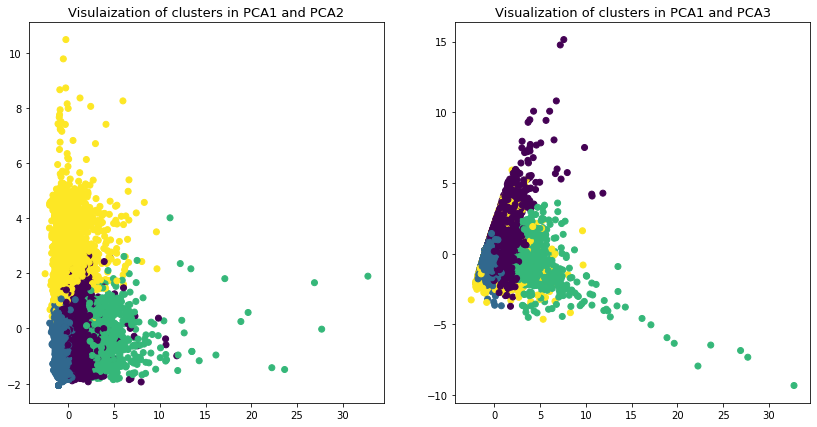

In [36]:
# Scatter plot on Principal components to visualize the spread of the data
fig = plt.figure(figsize=(14,7))

plt.subplot(121)
plt.scatter(x = pca_results['PCA1'], y = pca_results['PCA2'], c= pca_results['clusters_4']  )
plt.title('Visulaization of clusters in PCA1 and PCA2', fontsize = 13)

plt.subplot(122)
plt.scatter(x = pca_results['PCA1'], y = pca_results['PCA3'], c= pca_results['clusters_4']  )
plt.title('Visualization of clusters in PCA1 and PCA3', fontsize = 13)

plt.show()

Here in both plots the clusters look more mixed and not so well defined. 

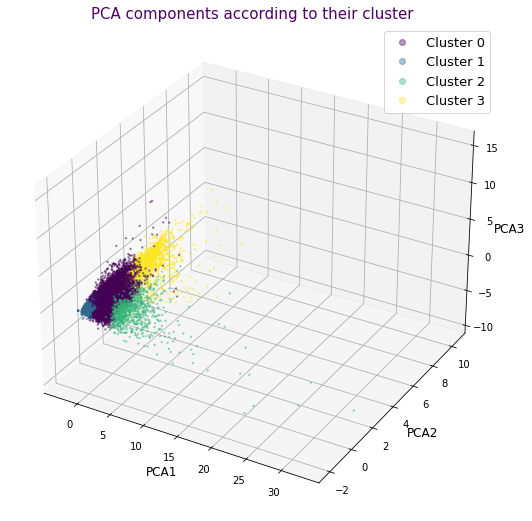

In [37]:
# seeing it in the 3 dimensions 

fig = plt.figure(figsize= (9,9))

ax = fig.add_subplot(projection = '3d')
plot = ax.scatter(pca_results['PCA1'], pca_results['PCA2'], pca_results['PCA3'], c = pca_results['clusters_4'], alpha = 0.4, s=2)
plt.legend(handles = plot.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], prop={'size': 13})
plt.xlabel("PCA1", fontsize = 12)
plt.ylabel("PCA2", fontsize = 12)
ax.set_zlabel("PCA3", fontsize = 12)
plt.title('PCA components according to their cluster', fontsize= 15, color= '#4d0066')
plt.show()

Looking at the PCA components in 3D we see what we suspected in 2D, the clusters are not so well defined. 

**We will choose 3 clusters** again since looking at the data it seems the most appropriate. 

In [17]:
# append clusters_3 results to our data_sampled dataframe 
clusters = data_sample.copy()

clusters['predicted_clusters'] = cluster.labels_

In [18]:
clusters.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,CancellationCode,DelayReason,UniqueCarrier,predicted_clusters
840447,89.0,87.0,2.0,44.0,247,7,5,6,2,Not Cancelled,CarrierDelay,9E,0
1379581,12.0,9.0,3.0,30.0,120,15,8,8,5,Not Cancelled,Delay below 15 (unknown reason),9E,0
1596541,9.0,11.0,-2.0,104.0,668,12,10,12,7,Not Cancelled,Delay below 15 (unknown reason),9E,0
1881951,30.0,20.0,10.0,42.0,163,10,12,16,2,Not Cancelled,LateAircraftDelay,9E,0
331864,16.0,14.0,2.0,79.0,469,6,2,28,4,Not Cancelled,CarrierDelay,9E,0


In [19]:
clusters.predicted_clusters.value_counts()

0    15248
1     3202
2      840
Name: predicted_clusters, dtype: int64

We see that the clusters, as in the previous model, are of different sizes. 

#### Analizing the results 

In [41]:
# describe of each cluster: 
clusters[clusters['predicted_clusters'] == 0].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,predicted_clusters
count,15248.00,15248.00,15248.00,15248.00,15248.00,15248.00,15248.00,15248.00,15248.00,15248.0
mean,34.33,34.73,-0.41,83.75,557.35,14.92,6.05,15.78,3.98,0.0
std,36.39,31.45,16.76,37.67,301.09,4.35,3.47,8.74,1.99,0.0
min,-36.00,0.00,-60.00,0.00,0.00,0.00,1.00,1.00,1.00,0.0
25%,9.00,12.00,-9.00,53.00,307.00,12.00,3.00,8.00,2.00,0.0
50%,23.00,23.00,-3.00,78.00,520.00,15.00,6.00,16.00,4.00,0.0
75%,50.00,48.00,5.00,111.00,775.00,19.00,9.00,23.00,6.00,0.0
max,518.00,397.00,277.00,258.00,1968.00,24.00,12.00,31.00,7.00,0.0


In [42]:
clusters[clusters['predicted_clusters'] == 1].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,predicted_clusters
count,3202.00,3202.00,3202.00,3202.00,3202.00,3202.00,3202.00,3202.00,3202.00,3202.0
mean,32.70,37.37,-4.67,226.58,1770.45,14.26,6.25,15.90,4.09,1.0
std,48.28,45.61,17.24,60.56,504.01,4.83,3.49,8.73,2.02,0.0
min,-55.00,6.00,-66.00,94.00,719.00,0.00,1.00,1.00,1.00,1.0
25%,5.00,11.25,-15.00,180.00,1400.00,11.00,3.00,8.00,2.00,1.0
50%,19.00,21.00,-5.00,215.50,1678.00,15.00,6.00,16.00,4.00,1.0
75%,43.00,44.00,3.00,267.00,2133.00,18.00,9.00,23.00,6.00,1.0
max,438.00,422.00,101.00,605.00,4962.00,23.00,12.00,31.00,7.00,1.0


In [43]:
clusters[clusters['predicted_clusters'] == 2].describe().round(2)

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,predicted_clusters
count,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.0
mean,217.52,213.60,3.92,94.42,625.13,16.19,5.91,16.21,4.01,2.0
std,111.55,112.48,19.47,41.22,337.05,6.15,3.58,8.86,2.05,0.0
min,117.00,111.00,-58.00,16.00,56.00,0.00,1.00,1.00,1.00,2.0
25%,160.00,155.00,-8.00,63.00,370.00,14.00,3.00,9.00,2.00,2.0
50%,191.00,186.00,0.00,89.50,590.00,18.00,6.00,16.00,4.00,2.0
75%,238.00,233.00,13.00,120.25,843.00,21.00,8.00,24.00,6.00,2.0
max,1395.00,1403.00,87.00,309.00,2367.00,23.00,12.00,31.00,7.00,2.0


The clusters are very similar to when using k-means: 

+ cluster 0 : low delay (somewhat higher than with k means), short distances
+ cluster 1 : low delay (somewhat higher than with k means), long distances 
+ cluster 2 : very high delay, in this case we see that the average delay is much higher than in the case of k means.

It seems that hierarchical clustering has further polarized the results: 

+ with k means cluster 1 and 2 were similar in size (cluster 2: 329326 and cluster 3:  218160). 
+ now cluster 1 is four times bigger than cluster 2 and it may be that some flights that with k means were in cluster 2 have moved to cluster 1 (of the flights with high delay the less delayed ones) 
+ We have to keep in mind that we are now using 1% of the observations and with k-means we were using 100%, so we cannot compare the performance well either. 

In [44]:
clusters[clusters['predicted_clusters'] == 0]['CancellationCode'].value_counts()

Not Cancelled    15241
Carrier              5
Weather              2
Name: CancellationCode, dtype: int64

In [45]:
clusters[clusters['predicted_clusters'] == 1]['CancellationCode'].value_counts()

Not Cancelled    3202
Name: CancellationCode, dtype: int64

In [46]:
clusters[clusters['predicted_clusters'] == 2]['CancellationCode'].value_counts()

Not Cancelled    840
Name: CancellationCode, dtype: int64

The canceled flights are 7 now (we are taking very few observations), and they all belong to cluster 0.

In [47]:
clusters[clusters['predicted_clusters'] == 0]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.360178
LateAircraftDelay                  0.275971
CarrierDelay                       0.203896
NASDelay                           0.129197
WeatherDelay                       0.029709
SecurityDelay                      0.001049
Name: DelayReason, dtype: float64

In [48]:
clusters[clusters['predicted_clusters'] == 1]['DelayReason'].value_counts(normalize= True)

Delay below 15 (unknown reason)    0.420675
LateAircraftDelay                  0.227358
CarrierDelay                       0.217676
NASDelay                           0.116490
WeatherDelay                       0.016240
SecurityDelay                      0.001562
Name: DelayReason, dtype: float64

In [49]:
clusters[clusters['predicted_clusters'] == 2]['DelayReason'].value_counts(normalize= True)

LateAircraftDelay    0.452381
CarrierDelay         0.271429
NASDelay             0.184524
WeatherDelay         0.090476
SecurityDelay        0.001190
Name: DelayReason, dtype: float64

We see that the reasons for delay follow the same order as in the previous model.

#### Graphical Analysis

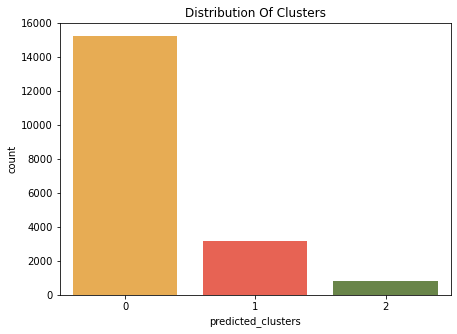

In [50]:
#Plotting countplot of clusters
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters['predicted_clusters'], palette= pal)
pl.set_title("Distribution Of Clusters")
plt.show()

The size of the clusters is very imbalanced. 

#### Analizing numerical features

Let´s draw boxplots on the numerical features: 

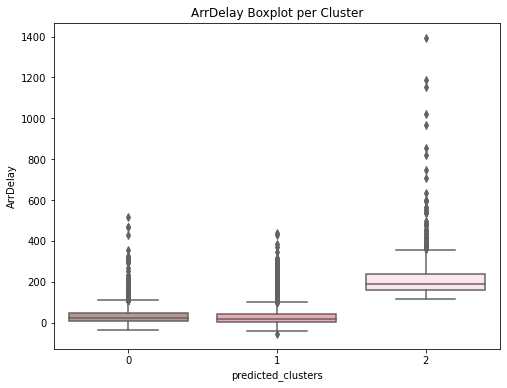

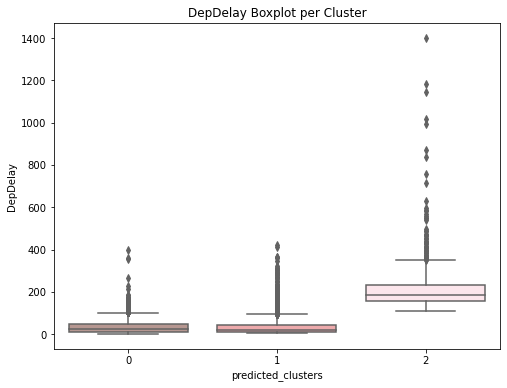

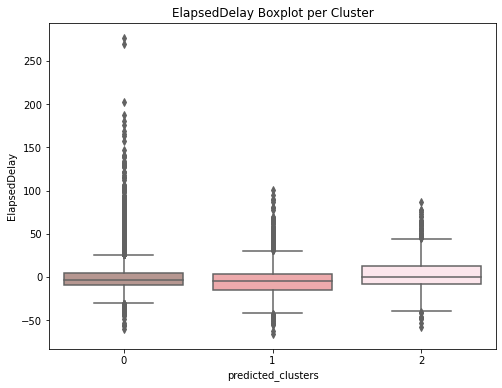

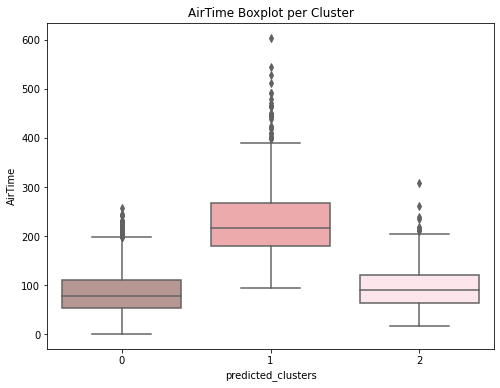

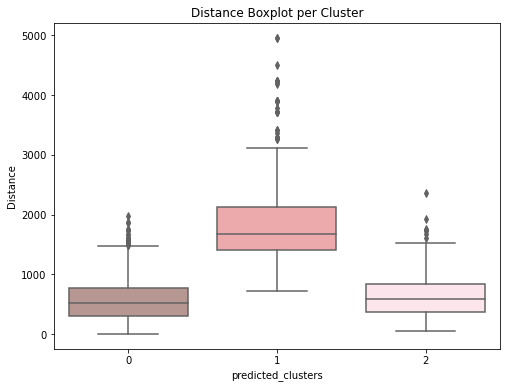

In [51]:
# list of features we are going to evaluate 
list = ['ArrDelay', 'DepDelay', 'ElapsedDelay', 'AirTime', 'Distance']

for i in list: 
    plt.figure(figsize = (8,6))
    sns.boxplot(x =clusters['predicted_clusters'], y = clusters[i], palette = ['#bc938b', '#f89fa1', '#ffe3eb'] )
    plt.title("{} Boxplot per Cluster".format(i),fontsize=12)
    plt.show()

+ ArrDelay and DepDelay: Cluster 0 and 1 look very much alike and Cluster 2 shows higher values and a lot of heavy ouliers. 

+ ElapsedDelay: here cluster 1 and 2 look alike, but we see differences in cluster 0, since it has a lot of ouliers for higher values (flights that took more time than expected once they departed)

+ AirTime/ Distance : we observe that cluster 0 and cluster 2 are very similar: lower mean values and few outliers. Cluster 1 is composed of higher values (longer flights) and more outliers.

Nos let´s check the distributions: 

<Figure size 576x360 with 0 Axes>

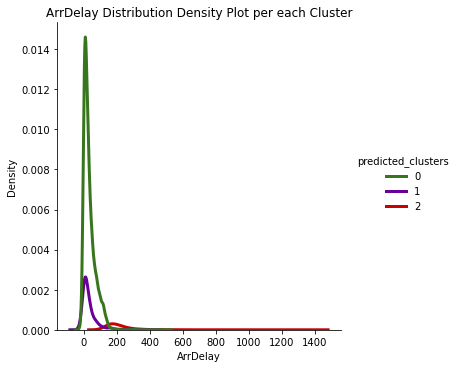

<Figure size 576x360 with 0 Axes>

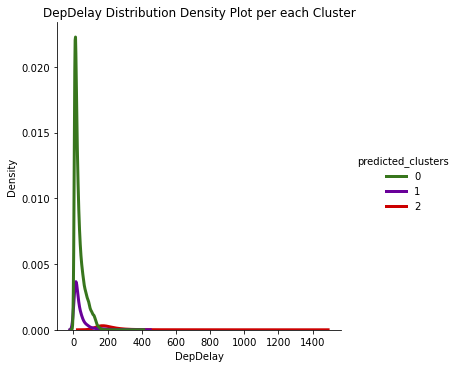

<Figure size 576x360 with 0 Axes>

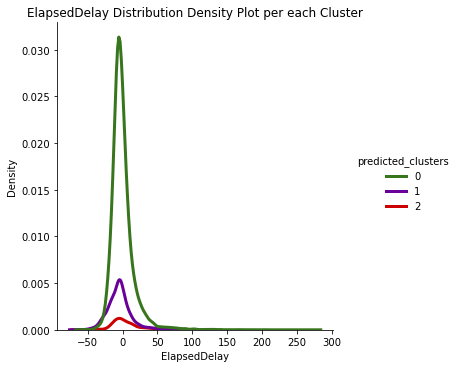

<Figure size 576x360 with 0 Axes>

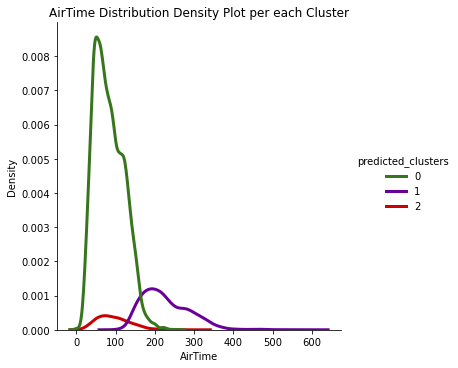

<Figure size 576x360 with 0 Axes>

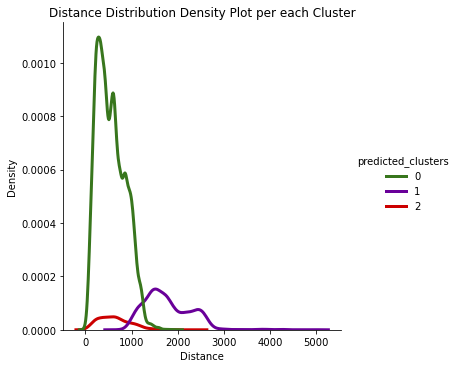

In [52]:
# distribucion de estas variables 
for i in list: 
    plt.figure(figsize = (8,5))
    sns.displot(x =clusters[i], hue = clusters['predicted_clusters'], kind = 'kde', 
                palette = ['#38761d', '#690099', '#cc0000'], linewidth = 3)
    plt.title("{} Distribution Density Plot per each Cluster".format(i),fontsize=12)
    plt.show()

+ ArrDelay and DepDelay: Clusters 0 and 1 centers around low values and cluster 2 values ranges until values around 1400 minutes!!
+ ElapsedDelay: Unlike the other features, in this case the distribution in the 3 clusters is quite similar and centered around approximately the same values (although there are differences due to the different sizes of each group)
+ AirTime/Distance: Here again we see that cluster 0 and 2 move in lower values and cluster 1 covers much larger values (longer flights). 

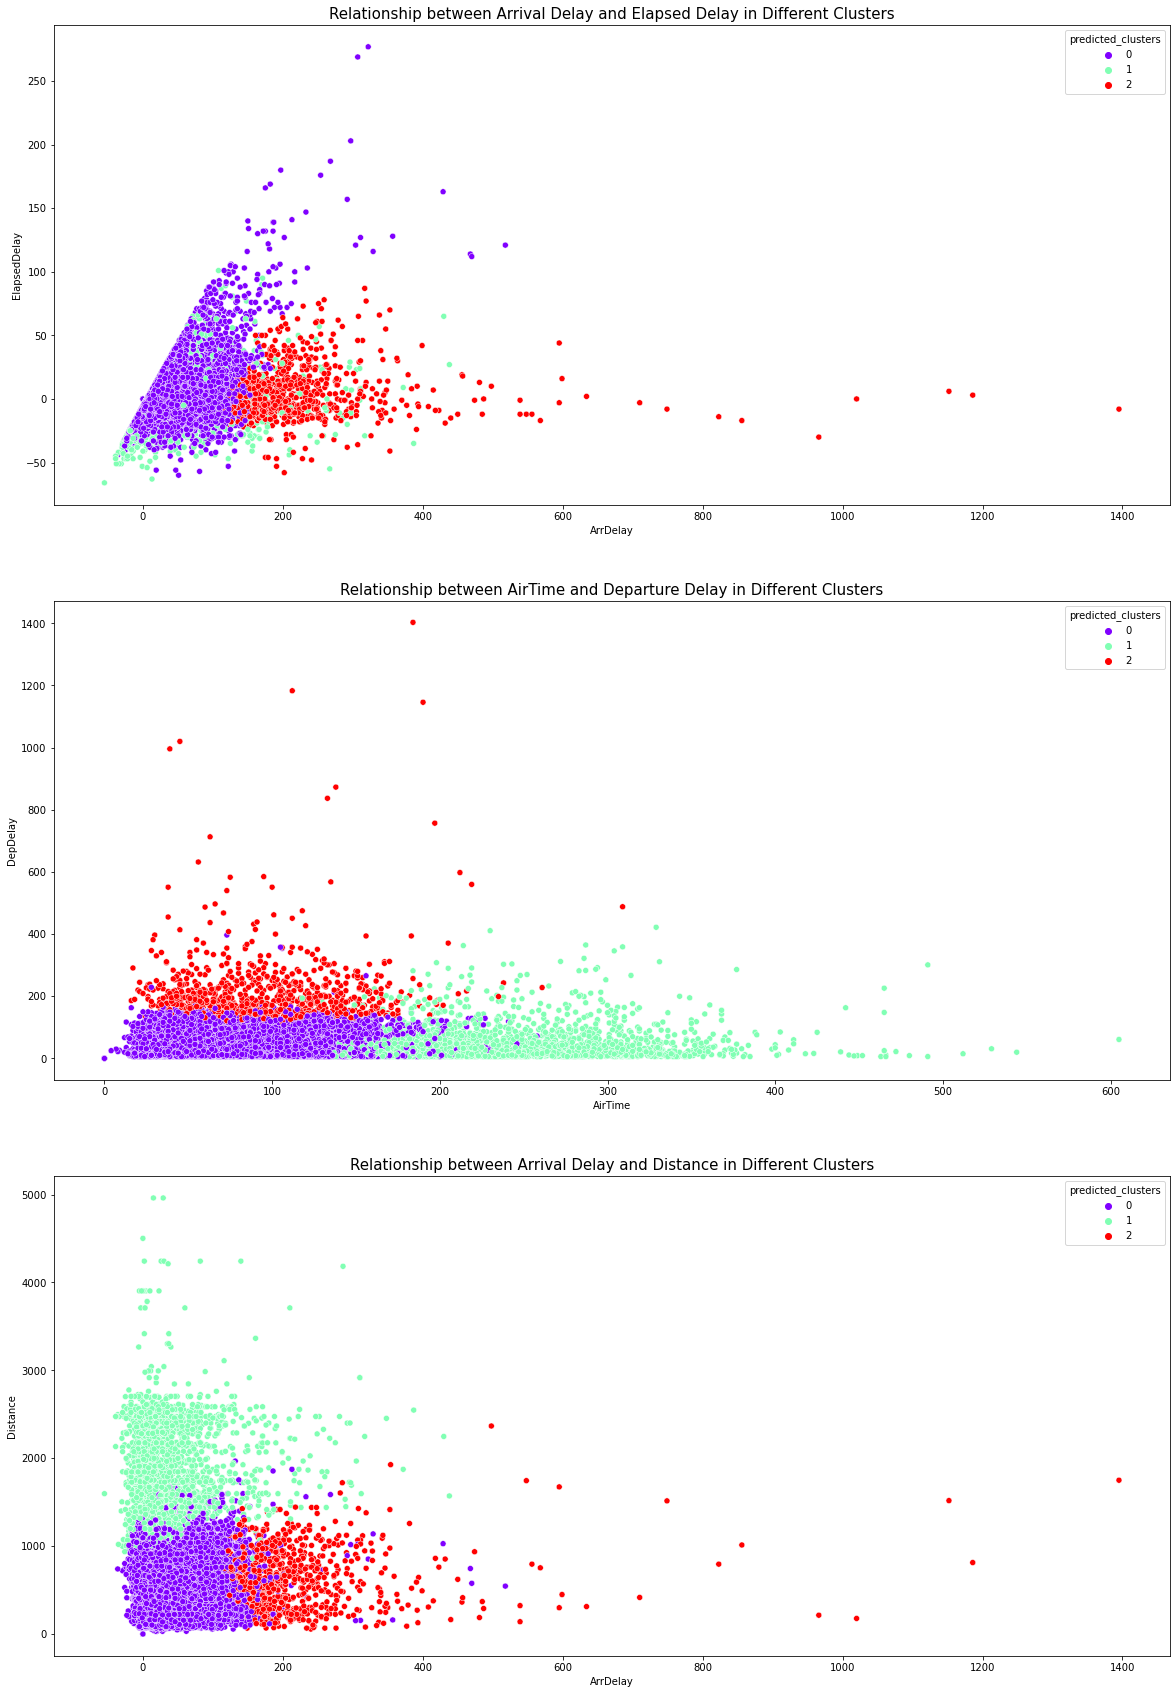

In [53]:
# some scatterplots 
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'ArrDelay', y = 'ElapsedDelay',hue='predicted_clusters',data = clusters,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Elapsed Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,2)
sns.scatterplot(x = 'AirTime', y = 'DepDelay',hue='predicted_clusters', data = clusters,legend='full',palette="rainbow")
plt.title('Relationship between AirTime and Departure Delay in Different Clusters', fontsize = 15)
plt.subplot(3,1,3)
sns.scatterplot(x = 'ArrDelay', y = 'Distance',hue='predicted_clusters', data=clusters,legend='full',palette="rainbow")
plt.title('Relationship between Arrival Delay and Distance in Different Clusters', fontsize = 15)
plt.show()

We can see that the clusters appear quite well defined in the scatterplots we have chosen for different variables, except in the case of the ElapsedDelay/ArrDelay plot where cluster 1 appears somewhat blurred between the other two. 

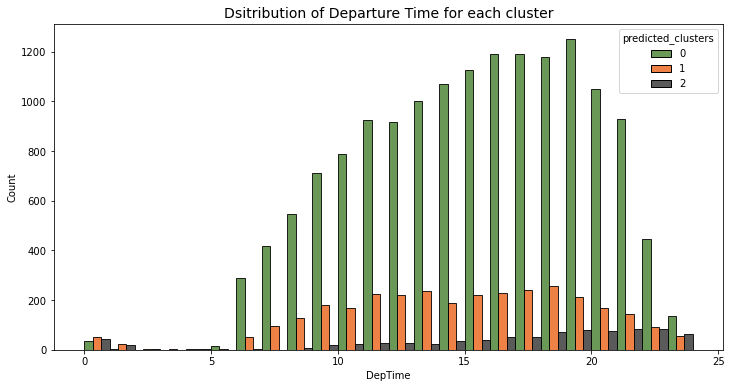

In [60]:
plt.figure(figsize=(12,6))
range_bin_width = range(0, 25, 1)

sns.histplot(x =clusters['DepTime'], hue = clusters['predicted_clusters'], bins= range_bin_width, multiple = 'dodge',  
            palette = ['#38761d', '#e85708', '#232323'])
plt.title('Dsitribution of Departure Time for each cluster', fontsize = 14); 

While flights belonging to cluster 1 and cluster 0 are decreasing from 19:00 p.m. onwards, flights belonging to cluster 2 are increasing until the end of the day (delayed flights are increasing as the hours go by). 

If we represent the percentage of each cluster for each Carrier we can extract similar conclusions as in our previous model: 

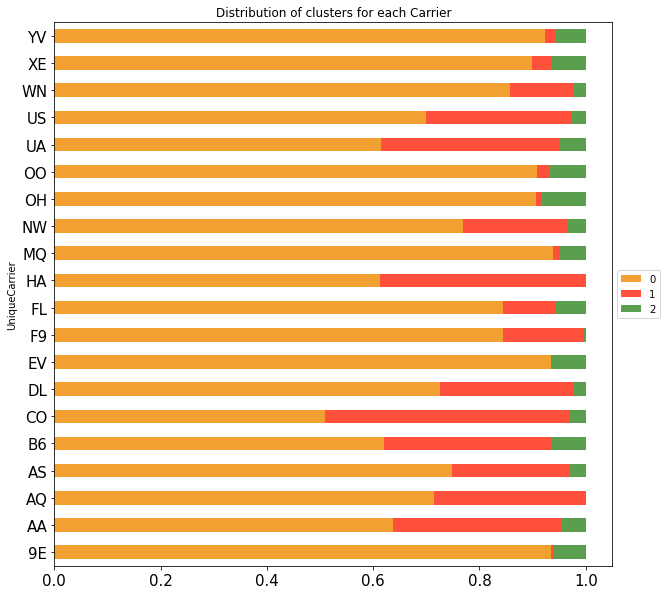

In [56]:
# do the percentage of each cluster for each carrier 
carriers_percent = clusters.groupby('UniqueCarrier')['predicted_clusters'].value_counts(normalize = True)
carriers_percent = carriers_percent.unstack()

carriers_percent.plot( kind = 'barh', stacked = True, mark_right = True, 
                     title = 'Distribution of clusters for each Carrier', fontsize = 15, 
                     figsize = (10,10), color = [ '#f1a031', '#ff503c', '#5b9e4d',])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)); 

+ AQ and HA ArrDelay time is much lower than average. 
+ OH delay time is higher than average
+ 9E operates in shorter flights 
+ CO flights are longer than average 

If we want to verify this: 

In [21]:
AQ_arrdel = clusters[clusters['UniqueCarrier'] == 'AQ']['ArrDelay'].mean()
HA_arrdel = clusters[clusters['UniqueCarrier'] == 'AQ']['ArrDelay'].mean()
avg_arrdel = clusters.ArrDelay.mean()

print('Average arrival delay for AQ: ', AQ_arrdel)
print('Average arrival delay for HA: ', HA_arrdel)
print('Average arrival delay for all flights: ', avg_arrdel)

Average arrival delay for AQ:  19.571428571428573
Average arrival delay for HA:  19.571428571428573
Average arrival delay for all flights:  42.03395541731467


In [22]:
OH_arrdel = clusters[clusters['UniqueCarrier'] == 'OH']['ArrDelay'].mean()

print('Average arrival delay for OH: ', OH_arrdel)
print('Average arrival delay for all flights: ', avg_arrdel)

Average arrival delay for OH:  52.04952380952381
Average arrival delay for all flights:  42.03395541731467


In [23]:
distance_9E = clusters[clusters['UniqueCarrier'] == '9E']['Distance'].mean()
avg_distance = clusters.Distance.mean()

print('Average distance for 9E Carrier: ', distance_9E)
print('Average distance for all flights: ', avg_distance)

Average distance for 9E Carrier:  450.7577519379845
Average distance for all flights:  761.6677034733023


In [24]:
distance_CO = clusters[clusters['UniqueCarrier'] == 'CO']['Distance'].mean()

print('Average distance for CO Carrier: ', distance_CO)
print('Average distance for all flights: ', avg_distance)

Average distance for CO Carrier:  1221.9919839679358
Average distance for all flights:  761.6677034733023


We confirm that the conclusions we have drawn by looking at the graph are correct.

### - Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

For this exercise we are going to evaluate our sampled dataset with 1% of observations, since computational time is very slow for the whole dataset. 

We will loop through values of k again. This time, instead of computing SSE, we will compute the silhouette coefficient: 

In [57]:
pca_df.shape

(19290, 3)

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# use the same parameters as in our previous model 
kmeans_kwargs = {
            "init": "k-means++",
            "n_init": 10,
            "max_iter": 150,
            "random_state": 42,
            }

# silhouette starts at 2 clusters!!
for k in range(2,11): 
    kmeans = KMeans(n_clusters= k, **kmeans_kwargs)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_coefficients.append(score)

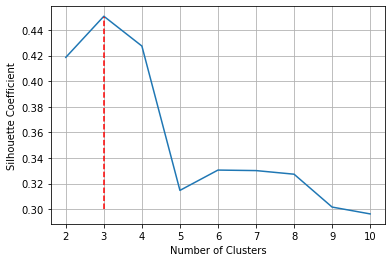

In [59]:
# plot the previous result
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.vlines(x= 3, ymax = 0.45, ymin= 0.30,  color = 'red', linestyles = '--')
plt.grid(True)
plt.show()

Silhouette coefficient again gives us the same result as the previous times: optimal number of clusters is 3. 

We can do a plot of what the coefficients would be like if we choose different values of k. We will do it for k values between 2 and 7. As it does not allow me to install the Yellowbrick library in the current environment, I will reopen the dataframes I was working with to run this code from a different environment. 

In [63]:
#data_sample.to_csv('data_sample.csv', index = False)

In [64]:
#pca_df.to_csv('pca_silhouette.csv', index = False)

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('data_sample.csv')
data.head()

,ArrDelay,DepDelay,ElapsedDelay,AirTime,Distance,DepTime,Month,DayofMonth,DayOfWeek,CancellationCode,DelayReason,UniqueCarrier
0,89.0,87.0,2.0,44.0,247,7,5,6,2,Not Cancelled,CarrierDelay,9E
1,12.0,9.0,3.0,30.0,120,15,8,8,5,Not Cancelled,Delay below 15 (unknown reason),9E
2,9.0,11.0,-2.0,104.0,668,12,10,12,7,Not Cancelled,Delay below 15 (unknown reason),9E
3,30.0,20.0,10.0,42.0,163,10,12,16,2,Not Cancelled,LateAircraftDelay,9E
4,16.0,14.0,2.0,79.0,469,6,2,28,4,Not Cancelled,CarrierDelay,9E


In [11]:
pca_df = pd.read_csv('pca_silhouette.csv')
pca_df.head()

,PCA1,PCA2,PCA3
0,1.124183,-1.318633,-0.186302
1,-0.740038,-1.616933,0.372953
2,-0.803521,-0.151427,0.150715
3,-0.280008,-1.458255,0.692841
4,-0.630416,-0.670318,0.327675


silhouette scores for k clusters:
2 : 0.417
3 : 0.451
4 : 0.428
5 : 0.315
6 : 0.331
7 : 0.324
maximum silhouette score for 3 clusters:  0.451


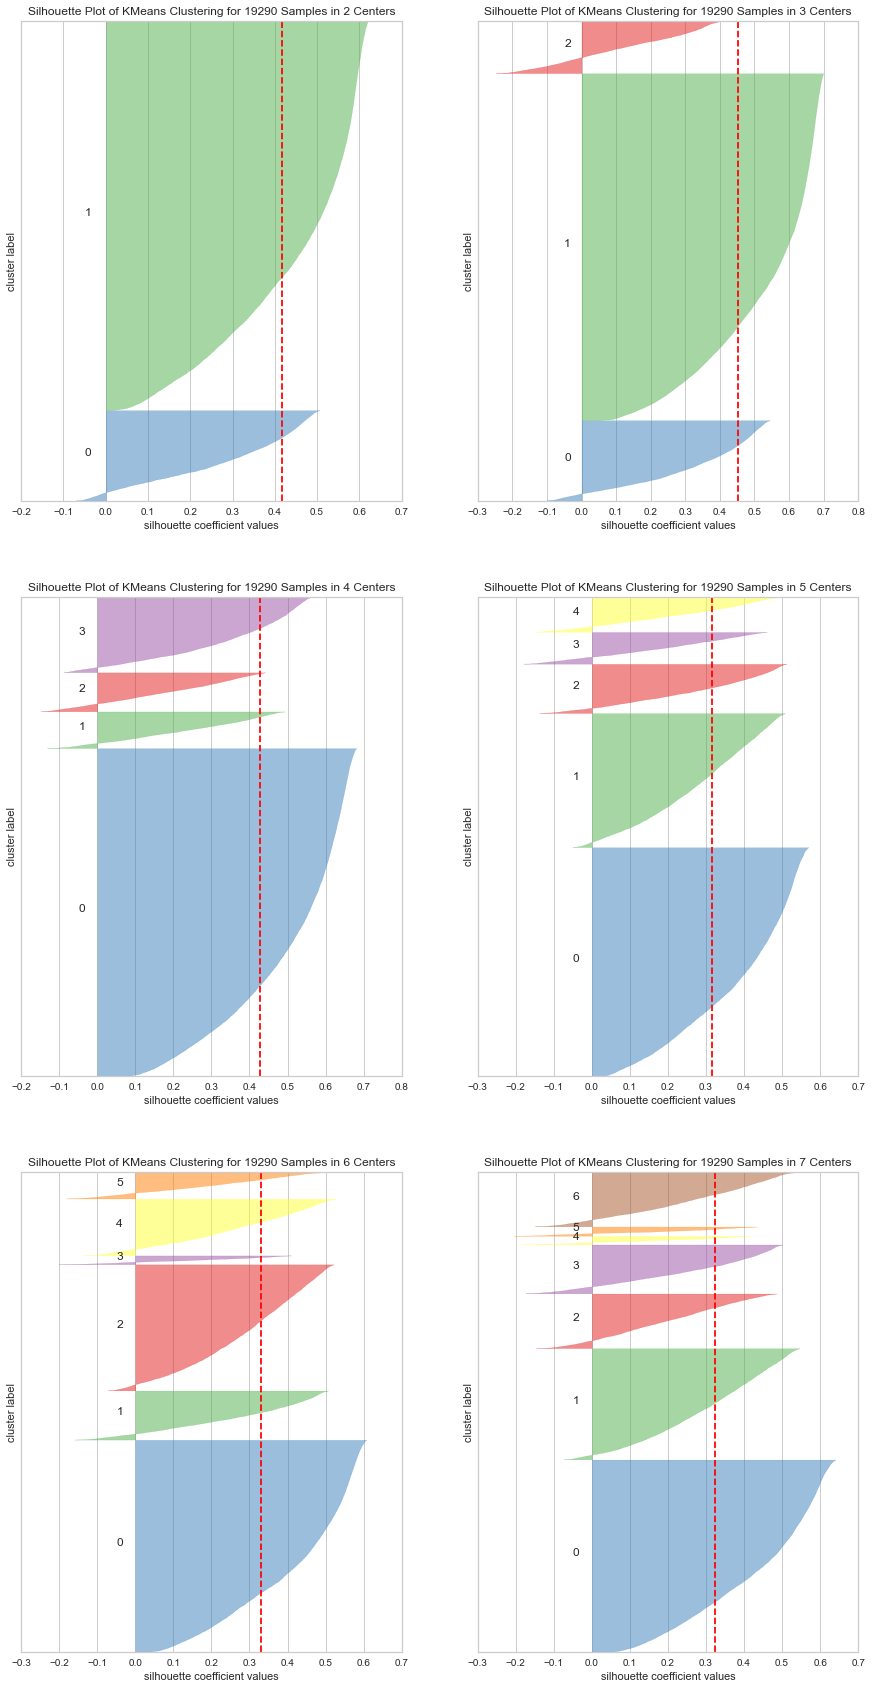

In [21]:
# silhouette score plots with Yellowbrick
dict_score = dict()
fig, ax = plt.subplots(3, 2, figsize=(15,30))

for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(i, 2)
    vis = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod], is_fitted=False)
    vis.fit(pca_df)
    vis.finalize()
    dict_score[i] = vis.silhouette_score_

print("silhouette scores for k clusters:")
_ = [print(k,":",f'{v:.3f}') for k,v in dict_score.items()]

K_sil_a3 = max(dict_score, key=dict_score.get)          # optimal clusters
sil_opt_a3 = dict_score[K_sil_a3]                       # optimal (maximal) silhouette score
print("maximum silhouette score for", f'{K_sil_a3:.0f} clusters: ', f'{sil_opt_a3:.3f}')

We observe in this plot again that the maximum value of silhouette score is for 3 clusters (0.451), for other k the values are between 0.315 and 0.428), so it's clear that optimal number of clusters is 3. 